In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 140
import utils
import os

datapath = "data/"
figpath = "fig/"
if not os.path.isdir(figpath):
    os.mkdir(figpath)

%load_ext autoreload
%autoreload 2

# Compare pointclouds

In [2]:
# Read data for world and more detailed in european region

# Read mean data.
df = pd.read_csv(datapath + "means-global.csv", skiprows=20)
# Compute weights according to latitude
lat_weights = np.array(np.cos(2*np.pi*df.lat / 360))
df["lat_weights"] = lat_weights
df_eu = pd.read_csv(datapath + "means-europe.csv", skiprows=20, usecols = ["lat", "lon"])
# Replace eu data for the one in df (to use the same satellite data)
df_eu = pd.merge(df_eu, df, how = "inner")

# Subsample for faster plotting
df_s = utils.subsample_df(df, 0.5)
df_eu_s = utils.subsample_df(df_eu, 0.5)

df_eu

,lat,lon,tilt,G,Tamb,Tmod,Tw,E,eff,suff,lat_weights
0,27.8,-15.6,29.0,2334.577468,19.591175,25.486531,36.997518,2240.476409,0.959692,0.699603,0.884581
1,27.8,-15.5,29.0,2297.757909,19.782174,25.239584,35.393140,2215.889817,0.964370,0.697113,0.884581
2,27.9,-15.8,26.0,2268.865367,19.591175,25.346950,37.539381,2173.007928,0.957751,0.681775,0.883766
3,27.9,-15.7,20.0,1779.099483,19.488811,24.167177,38.862317,1688.902243,0.949302,0.591554,0.883766
4,27.9,-15.6,26.0,2249.773018,19.488811,25.351571,38.517334,2147.901310,0.954719,0.682353,0.883766
...,...,...,...,...,...,...,...,...,...,...,...
66409,71.0,27.9,50.0,891.588705,0.326203,2.484029,14.250933,900.434961,1.009922,0.312007,0.325568
66410,71.0,28.0,51.0,879.300450,0.420033,2.557907,14.367344,887.394021,1.009205,0.308850,0.325568
66411,71.0,28.1,51.0,880.075602,0.686035,2.807175,14.428844,887.950941,1.008948,0.309131,0.325568
66412,71.0,28.2,50.0,876.807414,0.952545,3.047222,14.559013,884.293888,1.008538,0.308066,0.325568


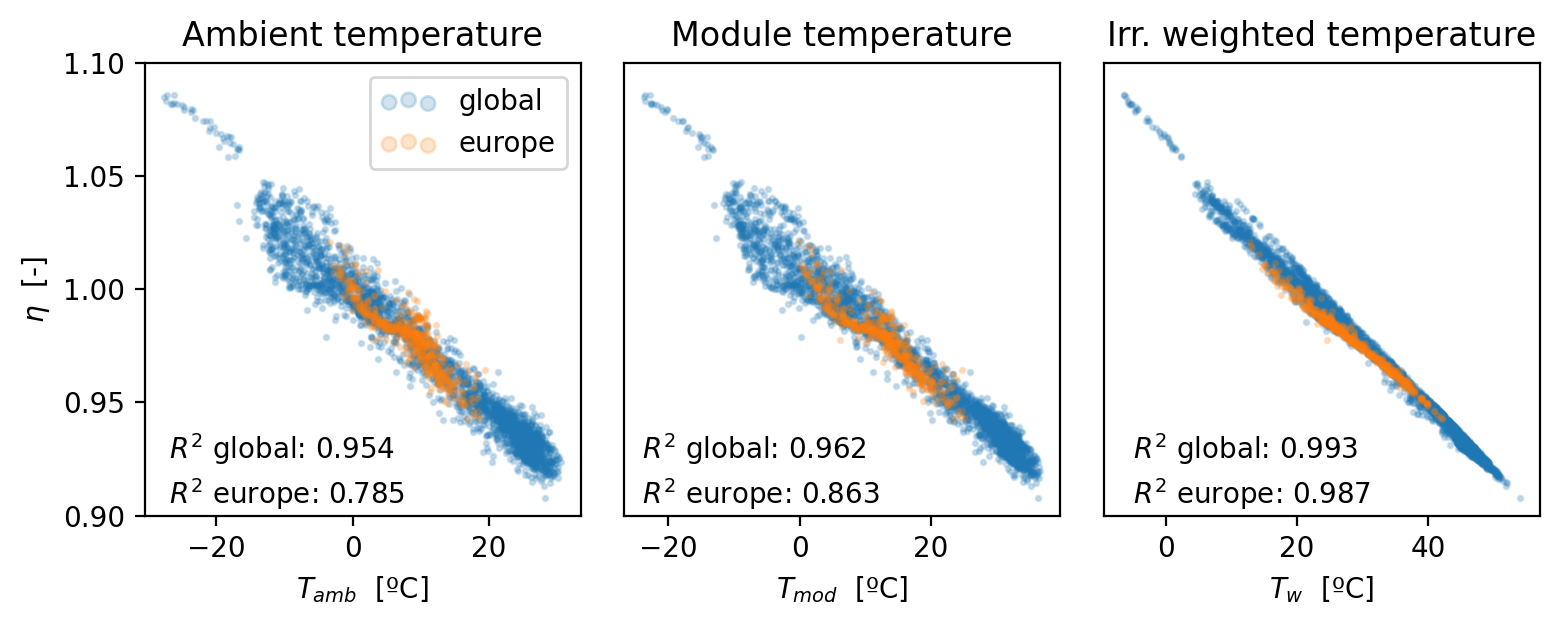

In [3]:
fig, axs = plt.subplots(figsize = (9,3), ncols = 3, dpi = 200)
cols = ["Tamb", "Tmod", "Tw"]
titles = ["Ambient temperature", "Module temperature", "Irr. weighted temperature"]
col_label = [r"$T_{amb}\ $ [ºC]", r"$T_{mod}\ $ [ºC]", r"$T_{w}\ $ [ºC]"]
x_text = [-27, -24, -5]
for i, col in enumerate(cols):
    axs[i].scatter(df_s[col][::20], df_s["eff"][::20], s = 3, alpha = 0.2)
    axs[i].scatter(df_eu_s[col][::5], df_eu_s["eff"][::5], s = 3, alpha = 0.2)
    axs[i].set_xlabel(col_label[i])
    if i == 0:
        axs[i].legend(["global", "europe"], loc = "upper right", markerscale = 3, scatterpoints = 3)
    R2_world = utils.compute_R2(df[col], df["eff"], np.array(df.lat_weights))
    R2_eu = utils.compute_R2(df_eu[col], df_eu["eff"], np.array(df_eu.lat_weights))
    axs[i].text(x_text[i], 0.925,rf"$R^2$ global: ${R2_world:.3f}$", fontsize = 10)
    axs[i].text(x_text[i], 0.905,rf"$R^2$ europe: ${R2_eu:.3f}$", fontsize = 10)
    axs[i].set_ylim([0.9,1.1])
    axs[i].set_rasterization_zorder(1.5)
    axs[i].set_title(titles[i])
axs[0].set_ylabel(r"$\eta\ $ [-]")
axs[0].set_yticks(np.arange(0.9, 1.11, 0.05))
axs[1].set_yticks([])        
axs[2].set_yticks([])        
plt.subplots_adjust(wspace = 0.1)
plt.savefig(figpath + "correlation-temperatures.pdf", bbox_inches = "tight")
plt.show()

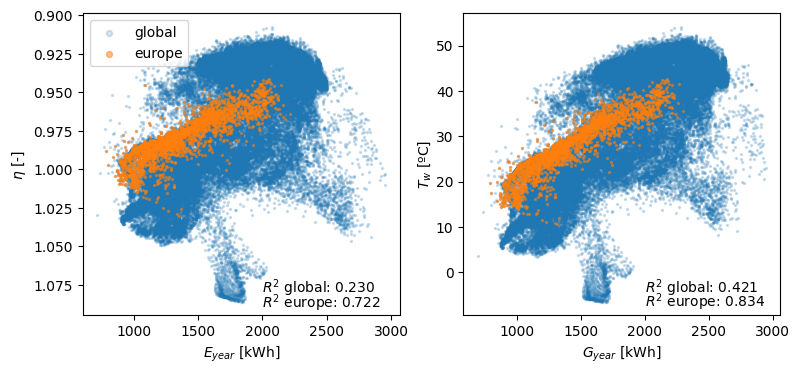

In [4]:
fig, axs = plt.subplots(figsize = (9,4), dpi = 100, ncols = 2)
# Plot for P and eff
axs[0].scatter(df_s["E"], df_s["eff"], s = 2, alpha = 0.2)
axs[0].scatter(df_eu_s["E"][::1], df_eu_s["eff"][::1], s = 2, alpha = 0.5)
axs[0].set_xlabel(r"$E_{year}$ [kWh]")
axs[0].set_ylabel(r"$\eta$ [-]")
axs[0].legend(["global", "europe"], loc = "upper left", markerscale = 3)
R2_global = utils.compute_R2(df["E"], df["eff"], np.array(df.lat_weights))
R2_eu = utils.compute_R2(df_eu["E"], df_eu["eff"], np.array(df_eu.lat_weights))
axs[0].text(2000, 1.08,rf"$R^2$ global: ${R2_global:.3f}$", fontsize = 10)
axs[0].text(2000, 1.09,rf"$R^2$ europe: ${R2_eu:.3f}$", fontsize = 10)
axs[0].invert_yaxis()

axs[1].scatter(df_s["G"], df_s["Tw"], s = 2, alpha = 0.2)
axs[1].scatter(df_eu_s["G"][::1], df_eu_s["Tw"][::1], s = 2, alpha = 0.5)
axs[1].set_xlabel(r"$G_{year}$ [kWh]")
axs[1].set_ylabel(r"$T_w$ [ºC]", labelpad = 2)
R2_global = utils.compute_R2(df["G"], df["Tw"], np.array(df.lat_weights))
R2_eu = utils.compute_R2(df_eu["G"], df_eu["Tw"], np.array(df_eu.lat_weights))
axs[1].text(2000, -4.5,rf"$R^2$ global: ${R2_global:.3f}$", fontsize = 10)
axs[1].text(2000, -7.5,rf"$R^2$ europe: ${R2_eu:.3f}$", fontsize = 10)

for ax in axs:
    ax.set_rasterization_zorder(1.5)

plt.savefig(figpath + "GT-scatter-and-reference-climates.pdf", bbox_inches = "tight")
plt.show()